In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Read the datafile and display the head of your dataframe**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Hafiz-Ostad Assignment/SVM Assignment/Aust_Credit_Approval_Data.csv")
display(df.head(10))

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,target
0,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      690 non-null    float64
 1   x2      690 non-null    float64
 2   x3      690 non-null    int64  
 3   x4      690 non-null    int64  
 4   x5      690 non-null    int64  
 5   x6      690 non-null    float64
 6   x7      690 non-null    int64  
 7   x8      690 non-null    int64  
 8   x9      690 non-null    int64  
 9   x10     690 non-null    int64  
 10  x11     690 non-null    int64  
 11  x12     690 non-null    int64  
 12  x13     690 non-null    int64  
 13  target  690 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 75.6 KB


In [7]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,target
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


Let's move on to machine learning.
## Machine Learning

**split the features & target**

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [9]:
X = df.drop('target', axis=1)
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213
1,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1
2,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1
3,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1
4,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1
686,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45
687,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1
688,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12


In [10]:
Y= df['target']
Y

,target
0,0
1,0
2,0
3,1
4,1
...,...
685,1
686,0
687,1
688,1


**split the train & test (70% Train data, 30% test data)**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [12]:
X_train

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
19,22.42,5.665,2,11,4,2.585,1,1,7,0,2,129,3258
482,20.42,0.000,2,8,4,0.000,0,0,0,0,3,184,1
101,38.67,0.210,2,4,4,0.085,1,0,0,1,2,280,1
398,23.25,12.625,2,8,4,0.125,0,1,2,0,2,0,5553
311,49.00,1.500,2,5,3,0.000,1,0,0,1,2,100,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,23.58,11.500,1,4,8,3.000,0,0,0,1,2,20,17
411,21.08,5.000,1,1,1,0.000,0,0,0,0,2,0,1
385,28.92,15.000,2,8,8,5.335,1,1,11,0,2,0,2284
422,29.83,1.250,1,4,4,0.250,0,0,0,0,2,224,1


### Importing and  training the Support Vector Classifier

**Import SVC and create its instance `svm_model`. Not required to find the best param to avoid complexity**

In [13]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [18]:
pipeline_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('svc', SVC(C=20, gamma='auto', kernel='linear'))
])

pipeline_poly = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('svc', SVC(C=20, gamma='auto', kernel='poly', degree=3))
])


In [19]:
pipeline_linear.fit(X_train, y_train)
pipeline_poly.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=10)),
                ('svc', SVC(C=20, gamma='auto', kernel='poly'))])

In [20]:
y_pred_linear = pipeline_linear.predict(X_test)
y_pred_poly = pipeline_poly.predict(X_test)

**Find the model Score**

In [22]:
print("=== LINEAR KERNEL RESULTS ===")
print("Training Accuracy:", pipeline_linear.score(X_train, y_train))
print("Test Accuracy:", pipeline_linear.score(X_test, y_test))
print(classification_report(y_test, y_pred_linear))

print("\n=== POLY KERNEL RESULTS ===")
print("Training Accuracy:", pipeline_poly.score(X_train, y_train))
print("Test Accuracy:", pipeline_poly.score(X_test, y_test))
print(classification_report(y_test, y_pred_poly))

=== LINEAR KERNEL RESULTS ===
Training Accuracy: 0.8674948240165632
Test Accuracy: 0.8405797101449275
              precision    recall  f1-score   support

           0       0.94      0.77      0.84       115
           1       0.76      0.93      0.84        92

    accuracy                           0.84       207
   macro avg       0.85      0.85      0.84       207
weighted avg       0.86      0.84      0.84       207


=== POLY KERNEL RESULTS ===
Training Accuracy: 0.9440993788819876
Test Accuracy: 0.8357487922705314
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       115
           1       0.78      0.88      0.83        92

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.84      0.84      0.84       207



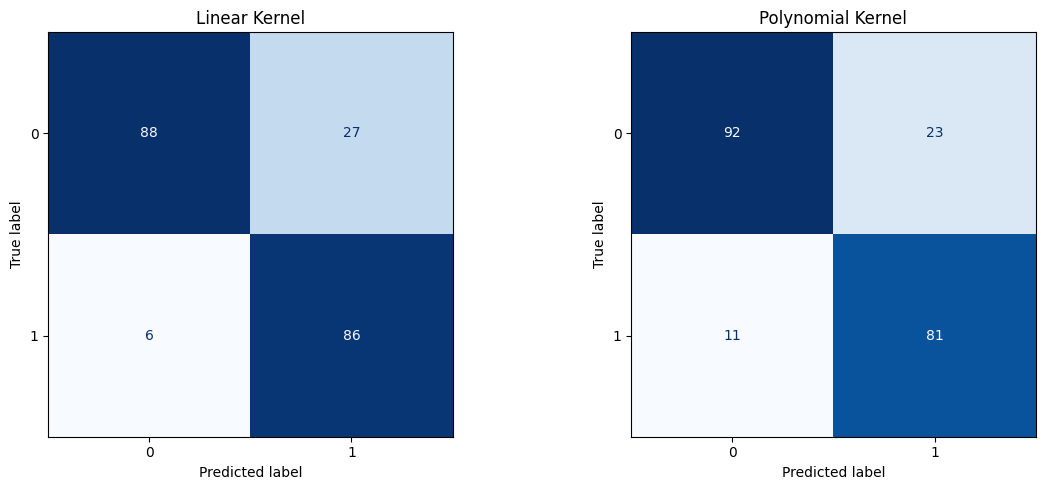

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_poly = confusion_matrix(y_test, y_pred_poly)

disp_linear = ConfusionMatrixDisplay(confusion_matrix=cm_linear)
disp_linear.plot(cmap=plt.cm.Blues, ax=axes[0], colorbar=False)
axes[0].set_title("Linear Kernel")

disp_poly = ConfusionMatrixDisplay(confusion_matrix=cm_poly)
disp_poly.plot(cmap=plt.cm.Blues, ax=axes[1], colorbar=False)
axes[1].set_title("Polynomial Kernel")

plt.tight_layout()
plt.show()